In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp1-dataset-customer-service-requests/Customer_Service_Requests_Analysis_Dataset/311-service-requests-nyc/311_Service_Requests_from_2010_to_Present.csv


In [2]:
csr = pd.read_csv("/kaggle/input/sp1-dataset-customer-service-requests/Customer_Service_Requests_Analysis_Dataset/311-service-requests-nyc/311_Service_Requests_from_2010_to_Present.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
csr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
csr.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [5]:
csr.shape

(364558, 53)

In [6]:
type(csr)

pandas.core.frame.DataFrame

In [7]:
csr.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [8]:
csr.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
csr.isna()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364554,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364555,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364556,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [10]:
csr.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [11]:
import matplotlib.pyplot as plt

(array([35.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.]),
 array([     0. ,  36455.8,  72911.6, 109367.4, 145823.2, 182279. ,
        218734.8, 255190.6, 291646.4, 328102.2, 364558. ]),
 <BarContainer object of 10 artists>)

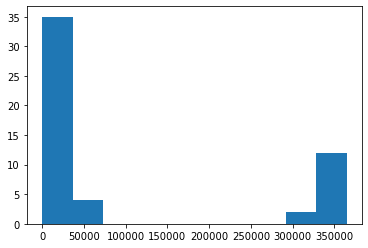

In [12]:
plt.hist(csr.isna().sum())

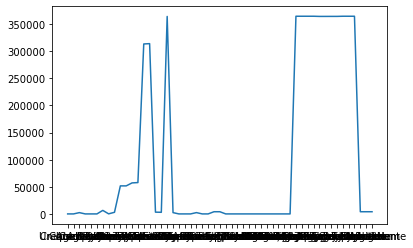

In [13]:
plt.plot(csr.isna().sum())

In [14]:
plt.show()

In [15]:
csr_null = csr.isna().sum()
print(type(csr_null))
print(type(csr.columns))
print(csr_null.index)

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.base.Index'>
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Directi

<BarContainer object of 53 artists>

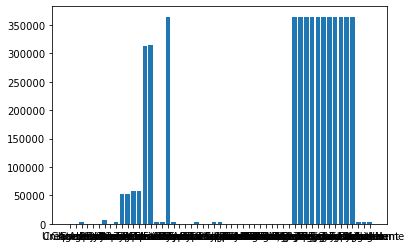

In [16]:
plt.bar(csr_null.index,csr_null)

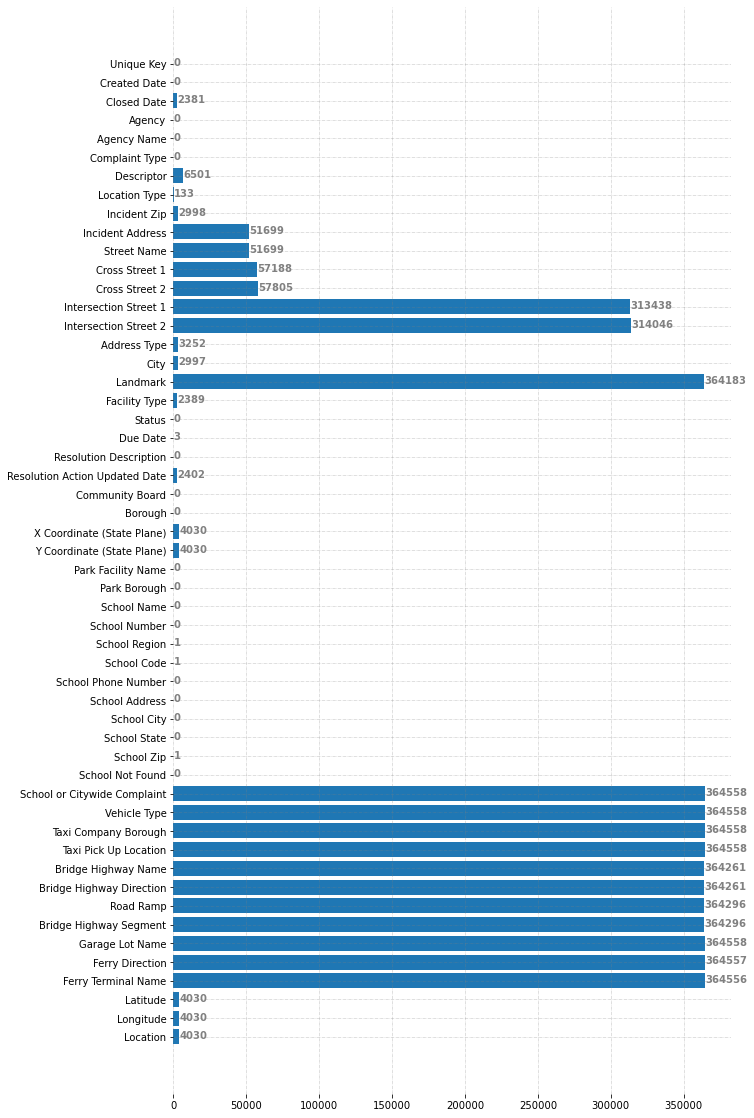

In [17]:
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(csr_null.index,csr_null)
ax.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.show()

In [18]:
#csr['Closed Date'].isnull().sum()
csr_cdate_null = csr['Closed Date'].isnull()
print(csr_cdate_null[csr_cdate_null==True].index)

csr_1 = csr.drop(csr_cdate_null[csr_cdate_null==True].index)

print(csr.shape, csr_1.shape)

Int64Index([   416,    611,   1648,   1816,   1965,   1987,   2149,   2415,
              2541,   2556,
            ...
            362939, 362943, 363376, 363378, 363614, 363643, 363789, 363805,
            364151, 364349],
           dtype='int64', length=2381)
(364558, 53) (362177, 53)


In [19]:
csr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [20]:
csr_1['Created Date']

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created Date, Length: 362177, dtype: object

In [21]:
#print(csr_1['Closed Date'].dtype)
#print(type(csr_1['Closed Date']))
#print(pd.to_datetime(csr_1[0,'Closed Date']))
#print(csr_1.iloc[0]['Created Date'],'\n',pd.to_datetime(csr_1.iloc[0]['Created Date']))
#print('Ok')
#print(csr_1['Closed Date'])

time_elapsed = pd.to_datetime(csr_1['Closed Date']) - pd.to_datetime(csr_1['Created Date'])
print(time_elapsed)
print(type(time_elapsed))
print(time_elapsed.dtype)


0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Length: 362177, dtype: timedelta64[ns]
<class 'pandas.core.series.Series'>
timedelta64[ns]


In [22]:
csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [23]:
csr_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      362177 non-null  int64  
 1   Created Date                    362177 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          362177 non-null  object 
 4   Agency Name                     362177 non-null  object 
 5   Complaint Type                  362177 non-null  object 
 6   Descriptor                      355681 non-null  object 
 7   Location Type                   362047 non-null  object 
 8   Incident Zip                    361502 non-null  float64
 9   Incident Address                310491 non-null  object 
 10  Street Name                     310491 non-null  object 
 11  Cross Street 1                  306846 non-null  object 
 12  Cross Street 2  

In [24]:
closed_date = pd.to_datetime(csr_1['Closed Date'],errors='coerce')
closed_date

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 362177, dtype: datetime64[ns]

In [25]:
created_date = pd.to_datetime(csr_1['Created Date'],errors='coerce')
created_date

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
364553   2015-01-01 00:04:44
364554   2015-01-01 00:04:28
364555   2015-01-01 00:01:30
364556   2015-01-01 00:01:29
364557   2015-01-01 00:00:50
Name: Created Date, Length: 362177, dtype: datetime64[ns]

In [26]:
closed_date[closed_date == 'NaT']
#this might not be correct

#closed_date.np.isnat().sum() --- this is wrong

Series([], Name: Closed Date, dtype: datetime64[ns])

In [27]:
#created_date[created_date == 'NaT']
print(np.isnat(created_date).sum(), np.isnat(closed_date).sum())

0 0


In [28]:
time_elapsed = closed_date - created_date
time_elapsed

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Length: 362177, dtype: timedelta64[ns]

In [29]:
time_elapsed[time_elapsed.dt.total_seconds() < 0]

Series([], dtype: timedelta64[ns])

In [30]:
time_elapsed = time_elapsed.dt.total_seconds()

In [31]:
time_elapsed

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Length: 362177, dtype: float64

In [32]:
time_elapsed.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
dtype: float64

In [33]:
csr_1['Complaint Type'].isna().sum()

0

In [34]:
#csr_1['City'].isna().sum()
pd.isna(csr_1['City']).sum()

#both are correct

674

In [35]:
csr_1[csr_1['City'].isna()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,01/02/2016 01:04:03 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,32309451,12/31/2015 05:40:16 PM,01/01/2016 10:59:11 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,72-23-72-2 72ND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,32309860,12/31/2015 05:05:30 PM,01/01/2016 08:17:35 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,9-15-9-99 CORNAGA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,32299438,12/30/2015 11:55:25 AM,12/30/2015 02:35:54 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NaN,101 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2131,32294310,12/29/2015 02:53:28 PM,12/29/2015 05:46:06 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,3300-3398 37TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361851,29633795,01/04/2015 11:19:28 PM,01/05/2015 10:13:06 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,25-40-25-4 48TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361912,29632589,01/04/2015 09:20:56 PM,01/05/2015 01:46:10 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,47-22-47-9 216TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361975,29633040,01/04/2015 08:04:21 PM,01/05/2015 01:07:15 PM,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Horn,Store/Commercial,NaN,58-28-58-9 99TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362048,29633311,01/04/2015 06:21:17 PM,01/06/2015 08:26:39 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,26000-2609 79TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
csr_1['City'].fillna('Unknown City',inplace=True)

In [37]:
csr_1[csr_1['City'].isna()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


(array([257741.,  16180.,  13762.,  37085.,  10873.,  13336.,   6433.,
          4733.,    725.,   1309.]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]),
 <BarContainer object of 10 artists>)

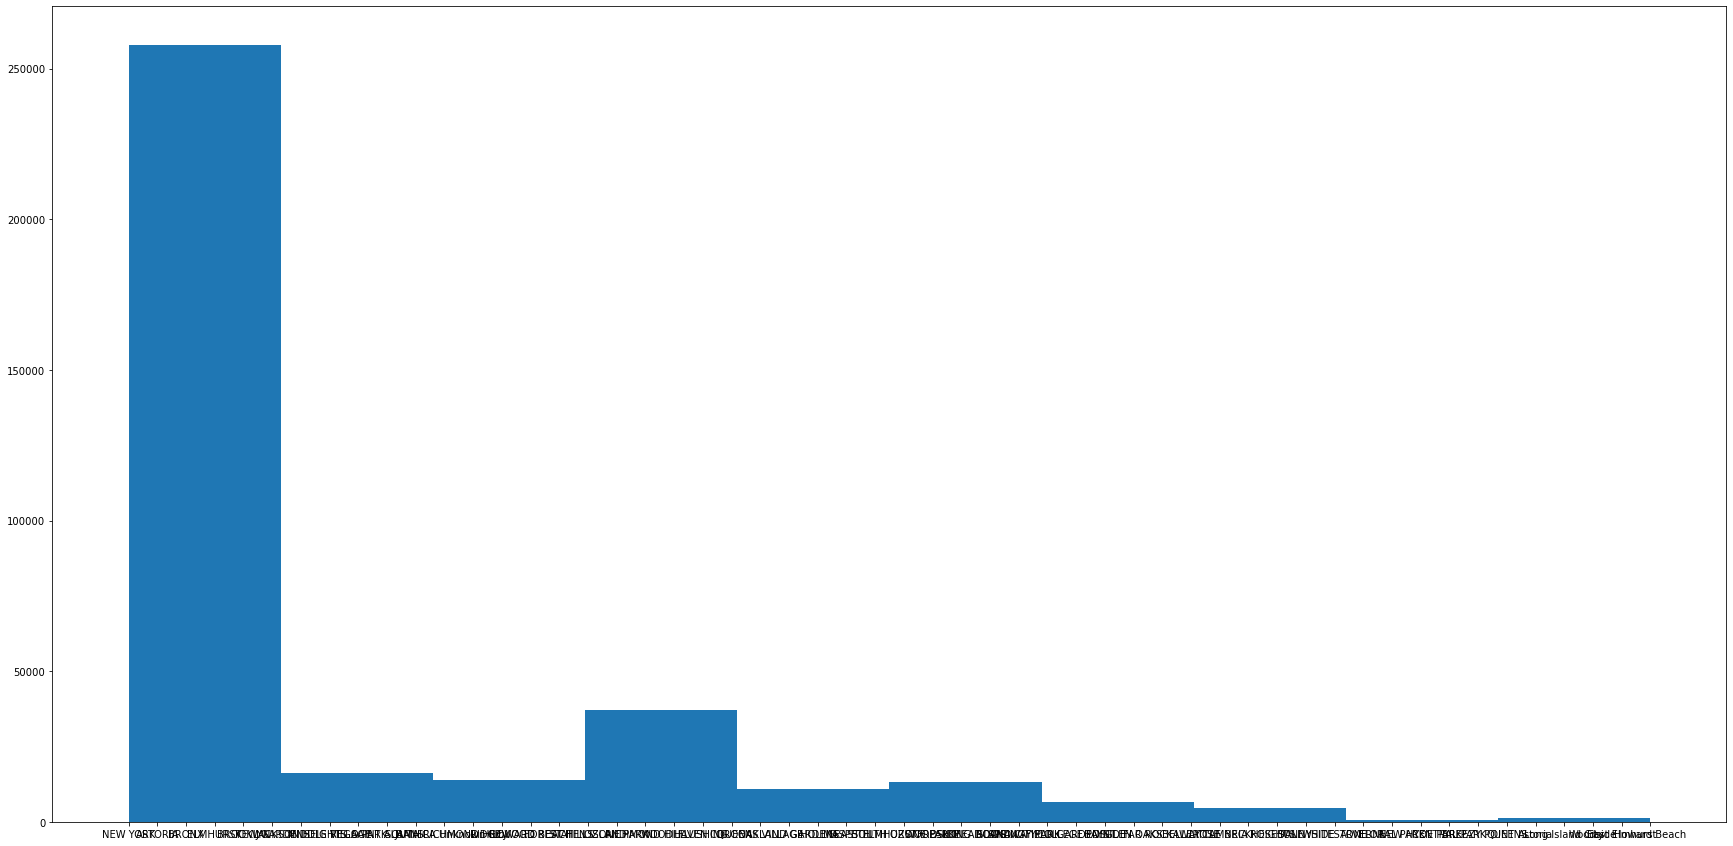

In [38]:
fig = plt.figure(figsize=(30,15))
plt.hist(csr_1['City'])


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

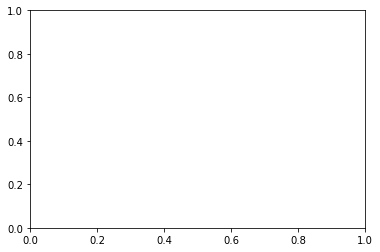

In [39]:
plt.xticks()